In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb

In [3]:
path = "../abalone.data"

data = pd.read_csv(path, names =[
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
])

In [13]:
data.shape

(4177, 9)

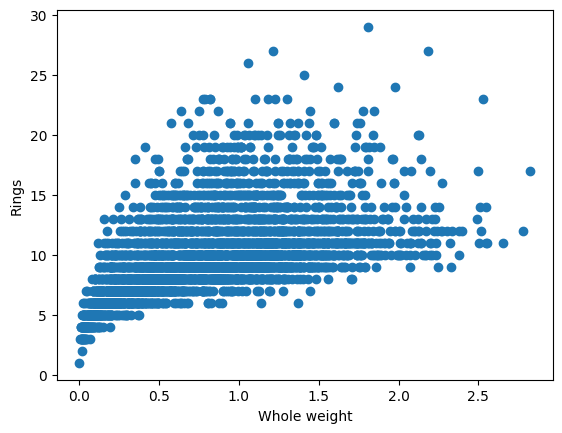

In [4]:
plt.scatter(data["Whole weight"], data["Rings"])

plt.xlabel("Whole weight")
plt.ylabel("Rings")
plt.show()

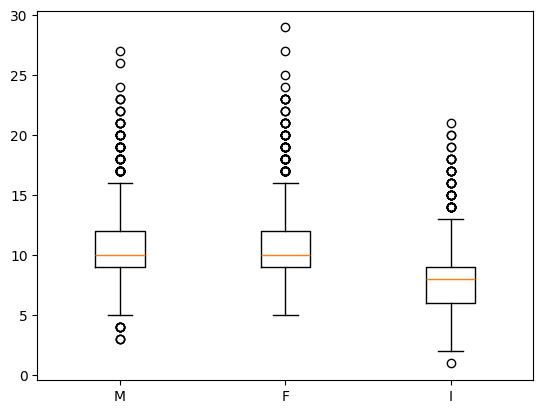

In [5]:
data_to_plot = [
    data[data["Sex"] == "M"]["Rings"],
    data[data["Sex"] == "F"]["Rings"],
    data[data["Sex"] == "I"]["Rings"]
    ]

plt.boxplot(data_to_plot)
plt.xticks([1, 2, 3], ["M", "F", "I"])
plt.show()



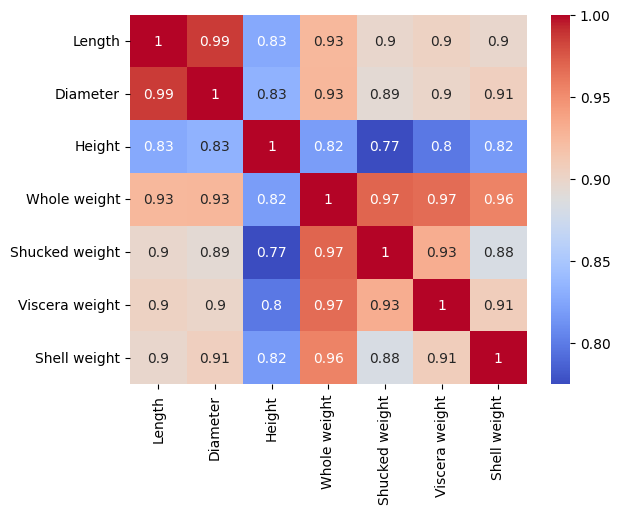

In [6]:
cont = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight"
]
# Corr
corr = data[cont].corr()
sns.heatmap(
    corr,
    cmap = 'coolwarm',
    annot = True,

)
plt.show()

In [8]:
y = data["Rings"]
X = data[['Sex','Length','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]

In [9]:
X['sex.M'] = X['Sex'].apply(lambda x: 1 if x == 'M' else 0)
X['sex.F'] = X['Sex'].apply(lambda x: 1 if x == 'F' else 0)
X['sex.I'] = X['Sex'].apply(lambda x: 1 if x == 'I' else 0)

X = X.drop('Sex', axis = 1)
X

,Length,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.5140,0.2245,0.1010,0.1500,1,0,0
1,0.350,0.090,0.2255,0.0995,0.0485,0.0700,1,0,0
2,0.530,0.135,0.6770,0.2565,0.1415,0.2100,0,1,0
3,0.440,0.125,0.5160,0.2155,0.1140,0.1550,1,0,0
4,0.330,0.080,0.2050,0.0895,0.0395,0.0550,0,0,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.3700,0.2390,0.2490,0,1,0
4173,0.590,0.135,0.9660,0.4390,0.2145,0.2605,1,0,0
4174,0.600,0.205,1.1760,0.5255,0.2875,0.3080,1,0,0
4175,0.625,0.150,1.0945,0.5310,0.2610,0.2960,0,1,0


In [10]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

model.fit(X, y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

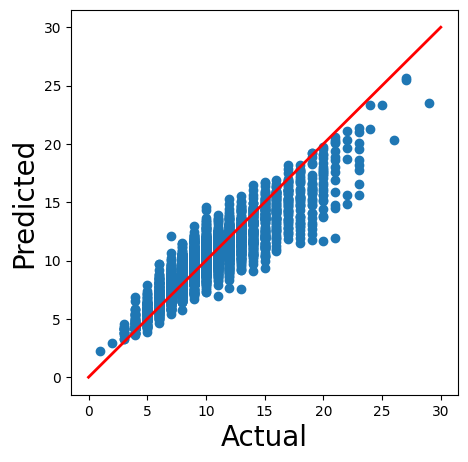

In [11]:
y_pred = model.predict(X)

#sho plot 
plt.figure(figsize=(5,5))

plt.scatter(y,y_pred)
plt.plot([0,30],[0,30],color='red',linestyle='-',linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)


In [12]:
explainer = shap.Explainer(model)

shap_values = explainer(X)

shap_of_shap_values = np.shape(shap_values)

print(shap_of_shap_values)

(4177, 9)


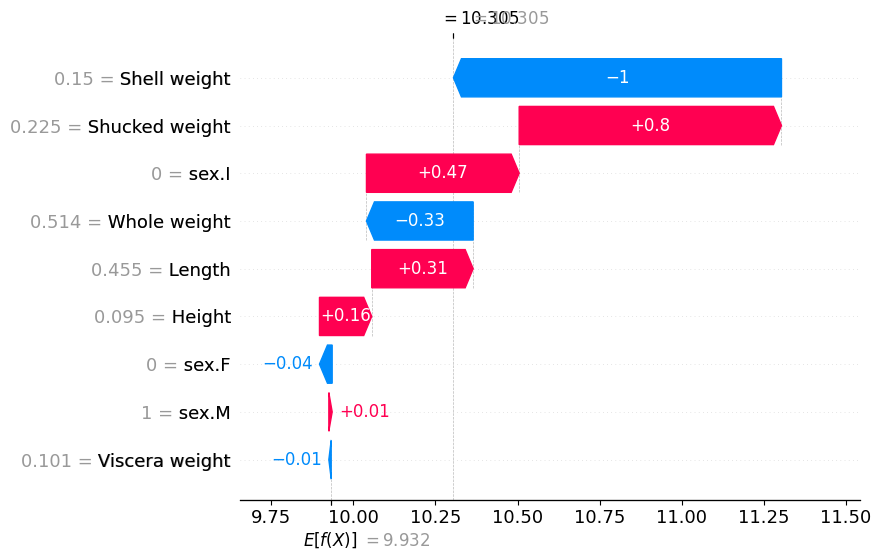

In [14]:
shap.plots.waterfall(shap_values[0])

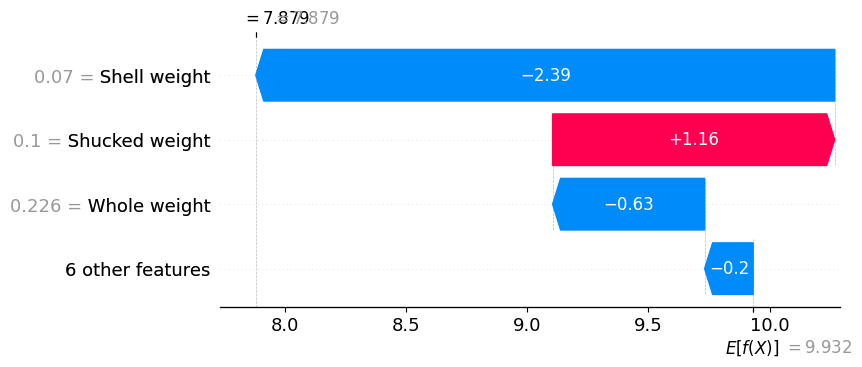

In [25]:
shap.plots.waterfall(shap_values[1],max_display=4)

In [17]:
shap.initjs()

shap.plots.force(shap_values[0:10])

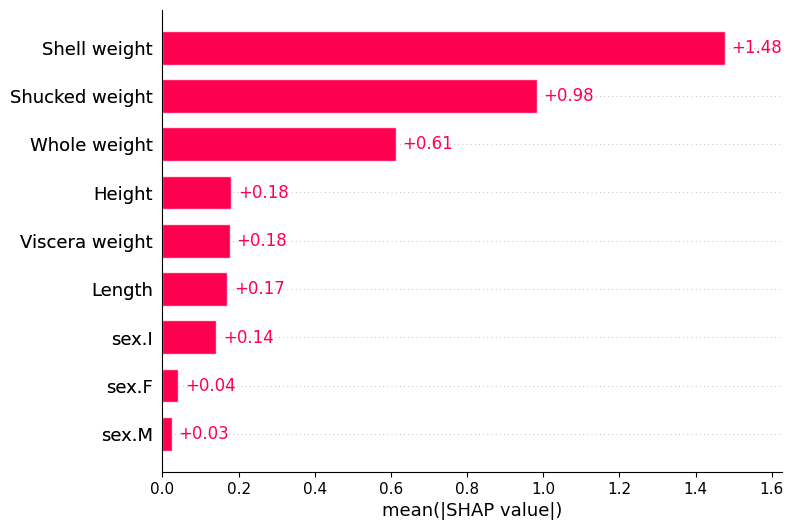

In [19]:
shap.plots.bar(shap_values)

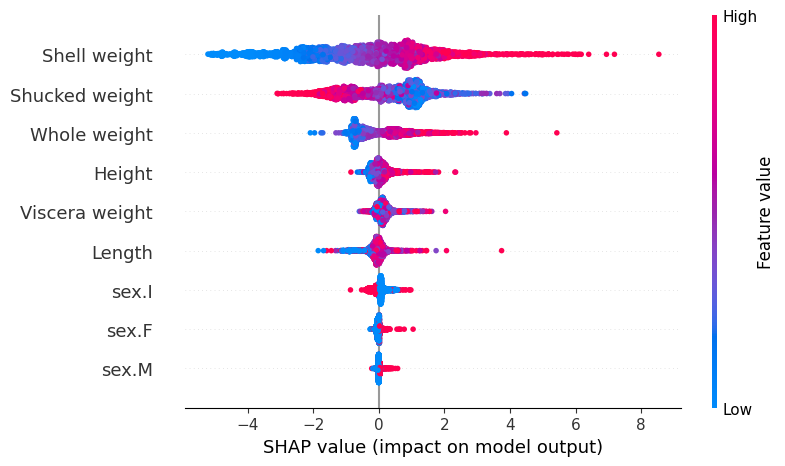

In [20]:
shap.plots.beeswarm(shap_values)